# Deep Simulation

We have understood controlled neural differential equations as structural roof of many sorts of neural networks. So far we have abstractly considered the initial value as input, even though it became clear in applications as Deep Portfolio Optimization or Deep Hedging that the dependence on control variable is equally interesting. In the sequel we shall investigate this further.

Consider a controlled neural differential equation
$$
dX_t = \sum_{i=0}^d V_i(X_t) d u^i(t) \, , \; X_0 = y \in \mathbb{R}^m
$$
for neural networks $ V_i : \mathbb{R}^m \to \mathbb{R}^m $, $ i = 1,\ldots,d$ and $ d $ continuous, finite variation controls $ u^i $. We are interested in the behaviour of the map
$$
\text{ control $u$ } \mapsto \text{ solution process } X \, .
$$
Taylor expansion along controls gives a satisfying answer to this question. Let us study this in some detail.

By the fundamental theorem of calculus we obtain for every smooth test function $ f $ that
$$
f(X_t) = x + \sum_{i=0}^d \int_0^t V_i f(X_s) du^i(s)
$$
for $ 0 \leq t $. This equation can be inserted into itself which leads to a generalized version of Taylor expansion for controlled ODEs
$$
\sum_{k=0}^M \sum_{(i_1,\ldots,i_k) \in {\{0,\ldots,d\}}^k} V_{i_1} \ldots V_{i_k} f(x) \int_{0 \leq t_1 \leq \ldots \leq t_k \leq t} du^{i_1}(t_1) \dots du^{i_k}(t_k) + R_M(f,t) \, ,
$$
for $ M \geq 0 $, with the remainder satisfying
$$
R_M(f,t) = \sum_{(i_1,\ldots,i_{M+1}) \in {\{0,\ldots,d\}}^{M+1}} 
\int_{0 \leq t_1 \leq \ldots \leq t_{M+1} \leq t}
V_{i_1} \ldots V_{i_{M+1}} f(X_{t_{1}})  du^{i_1}(t_1) \dots du^{i_k}(t_{M+1}) \, .
$$
Notice that the vector field $ V $ acts on test function $ f $ as transport operator, i.e.
$$
Vf(x) : = df(x)(V(x))
$$
for $ x \in \mathbb{R}^m $.

Let us put this into an algebraic setup to understand better the structure of iterated integrals. Consider an algebra of non-commutative power series generated from $ d +1 $ non-commuting (free) indeterminates $ e_0,\ldots,e_d $ (this mimicks the action of the vector fields, which generically do not commute). Every element of this algebra can be written as
$$
Z_t =  \sum_{k=0}^\infty \sum_{(i_1,\ldots,i_k) \in {\{0,\ldots,d\}}^k} a_{i_1,\ldots,i_k} e_{i_1} \dots e_{i_k} \, ,
$$
without any further convergence assumption. This algebra is denoted by $ \mathbb{A}_{d+1} $. Dually we can consider the free vector space on finite words in letters $ \{ 0, \ldots, d \} $. As a subspace of $ \mathbb{A}_{d+1} $ we distinguish the Lie algebra $ \mathfrak{g} $ generated by $ e_0,\ldots,e_d$. Its associated exponential image is denoted by $ G $ and is a group.

By [Chow's theorem](https://en.wikipedia.org/wiki/Chow%E2%80%93Rashevskii_theorem) 'every' point in $G$ can be represented as
$$
\sum_{k \geq 0} \sum_{(i_1,\ldots,i_k) \in {\{0,\ldots,d\}}^k}
      \int_{0 \leq t_1 \leq \dots \leq t_k \leq t}
      d u^{i_1}(t_1)\ldots d u^{i_k}(t_k) e_{i_1}  \ldots
      e_{i_k}
$$
for some continuous finite variation paths $ u $ taking values in $ \mathbb{R}^{d+1} $ and some time $ t > 0$. Of course each expression of the above type lies in $G$. This actually means that iterated integrals 'fill' the group $G$ and therefore $ G $ constitutes all algebraic relations among iterated integrals.

In order to apply the above theory to the actual calculation of controlled ODEs one has to make the calculation of iterated integrals tractable, which is non-trivial since they constitute an infinite dimensional system. In order to calculate iterated integrals up to order $M$ in dimension $ d $ actually $ \frac{(d+1)^{M+1}-1}{d} $ quantities have to be calculated which is exponential in $ M $.

An elegant way out might be to consider lower dimensional representations of iterated integrals which share their properties. This will be achieved by an application of the Johnson-Lindenstrauss Theorem, whose proof we shall sketch in the sequel.

Let us first state the formal assertion: for any $ 0 < \epsilon < 1 $ and any integer $ N \geq 1 $, any dimension $ k $ with
$$
k \geq \frac{24 \log N}{3 \epsilon^2 - 2 \epsilon^3}
$$
and any set $ A $ of $ N $ points in some $ \mathbb{R}^m $ there exists a map $ \pi: \mathbb{R}^m \to \mathbb{R}^k $ such that
$$
{|| x - y||}^2 (1-\epsilon) \leq{|| \pi(x) -\pi( y) ||}^2 \leq {|| x - y ||}^2 (1+\epsilon)
$$
for all point $ x,y \in A $, i.e. the geometry of $ A $ is almost preserved after the projection. Norms are $ L^2$ norms here.

The proof consists of three steps: let $ R $ denote a random matrix with independent identically distributed standard normal entries of dimension $ k \times m $. 
1. For $ u \in \mathbb{R}^m $ and $ v := \frac{1}{\sqrt{k}} R u $ it holds that
$$
E[{||v||}^2] = {||u||}^2 \, ,
$$
which is just a calculation with independent standard normals. Notice also that the entries of $ v $ are independent standard normal random variables with variance $ \frac{{||u||}^2}{k} $
2. It holds that
$$
P\big( {||v||}^2 \geq  {||u||}^2 (1+\epsilon) \big) \leq \frac{1}{N^2} \, . 
$$
Indeed
$$
P\big( {||v||}^2 \geq  {||u||}^2 (1+\epsilon) \big) = P\big (\exp(\lambda Z) \geq \exp(\lambda (1+\epsilon) k) \big )
$$
with a $ \chi^2 $ random variable of dimension $ k $. By Markov's inequality we arrive at
$$
P\big( {||v||}^2 \geq  {||u||}^2 (1+\epsilon) \big) \leq {\big( \frac{1}{\sqrt{1-2\lambda}\exp(\lambda(1+\epsilon))}\big)}^k \, .
$$
For $ \lambda = \frac{\epsilon}{2(1+\epsilon)} $ we obtain
$$
P\big( {||v||}^2 \geq  {||u||}^2 (1+\epsilon) \big) \leq \big( (1+\epsilon)\exp(-\epsilon) \big)^{k/2} \, ,
$$
which yields by $ \log (1+a) \leq a - a^2/2 + a^3/3 $ that
$$
P\big( {||v||}^2 \geq  {||u||}^2 (1+\epsilon) \big) \leq \frac{1}{N^2} \, .
$$
In an completely analogous manner (replace $ \lambda $ by $ - \lambda $ and arrive for $ \lambda = \frac{\epsilon}{2(1-\epsilon)} $ at an upper bound 
$$
\big( (1-\epsilon)\exp(-\epsilon) \big)^{k/2} \, ,
$$
which in turn can be estimated by $ \log (1-a) \leq -a - a^2/2 $. Whence the result
$$
P\big( {||v||}^2 \geq  {||u||}^2 (1+\epsilon) \text{ or } {||v||}^2 \leq  {||u||}^2 (1-\epsilon) \big) \leq \frac{2}{N^2} \, .
$$
3. Summing this up over all possible combination of two points yields that
$$
P\big(\text{ The ratio of norms of distances lies in } [1-\epsilon,1+\epsilon] \big) \geq \frac{1}{N} ,
$$
whence there exists a matrix $ R $ which does the job.

This result can now be applied to the differential equation in $ \mathbb{A}_{d+1} $ which generates the iterated integrals, namely
$$
d Z_t = \sum_{i=0}^d Z_t e_i du^i(t) \, .
$$
The random projection of $ Z_t $ will almost preserve the geometry of the iterated integrals (which is necessary for the quality of the regression), and the random projection can be calculated by means of a *random* controlled differential equation, which facilitates calculations tremendously.

In the sequel we shall see two instances where this is applied: first we learn an unknown stochastic differential equation.

In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

In [2]:
d=2
M=150

def nilpotent(M):
    B = np.zeros((M,M))
    for i in range(2,M):
        B[i,i-1]=1.0
    return B

def canonical(i,M):
    e = np.zeros((M,1))
    e[i,0]=1.0
    return e

def vectorfieldoperator(state,increment):
    d = np.shape(increment)[0]
    N = np.shape(state)[0]
    direction = np.zeros((N,1))
    for i in range(d):
        helper = np.zeros((N,1))
        for j in range(N):
            helper[j]=np.sin((j+1)*state[j,0])
        direction=direction + helper*increment[i]
    return direction

def vectorfield2d(state,increment):
    return np.array([(2.0*np.sqrt(state[1]**2))**0.7,1.0*state[1]])*increment[0]+np.array([(2.0*np.sqrt(state[1]**2))**0.7,0.0*state[1]])*increment[1]

def vectorfield3d(state,increment):
    return np.array([np.sin(5*state[0])*np.exp(-state[2]),np.cos(5*state[1]),-state[2]*state[1]])*increment[0]+np.array([np.sin(4*state[1]),np.cos(4*state[0]),-state[0]*state[1]])*increment[1]
def vectorfield(state,increment):
    return 5*np.exp(-state)*increment[0] + 5*np.cos(state)*increment[1]
def randomAbeta(d,M):
    A = []
    beta = []
    for i in range(d):
        B = 0.0*nilpotent(M) + np.random.normal(0.0,0.5,size=(M,M)) 
        B = np.random.permutation(B)
        A = A + [B]
        beta = beta + [0.0*canonical(i,M)+np.random.normal(0.0,0.5,size=(M,1))]
    return [A,beta]

Abeta = randomAbeta(d,M)
A = Abeta[0]
beta = Abeta[1]

def sigmoid(x):
    return np.tanh(x)

def reservoirfield(state,increment):
    value = np.zeros((M,1))
    for i in range(d):
        value = value + sigmoid(np.matmul(A[i],state) + beta[i])*increment[i]
    return value

In [3]:
class SDE:
    def __init__(self,timehorizon,initialvalue,dimension,dimensionBM,dimensionR,vectorfield,timesteps,):
        self.timehorizon = timehorizon
        self.initialvalue = initialvalue # np array
        self.dimension = dimension
        self.dimensionBM = dimensionBM
        self.dimensionR = dimensionR
        self.vectorfield = vectorfield
        self.timesteps = timesteps

    def path(self):
        BMpath = [np.zeros(self.dimensionBM)]
        SDEpath = [np.array([1.0, self.initialvalue])]
        for i in range(self.timesteps):
            helper = np.random.normal(0,np.sqrt(self.timehorizon/self.timesteps),self.dimensionBM)
            BMpath = BMpath + [BMpath[-1]+helper]
            SDEpath = SDEpath + [np.exp(-1.0*self.timehorizon/self.timesteps)*(SDEpath[-1]+self.vectorfield(SDEpath[-1],helper))]

        return [BMpath, SDEpath]
    
    def anypath(self):
        BMpath = [np.zeros(self.dimensionBM)]
        SDEpath = [np.array([1.0, self.initialvalue])]#[np.ones((self.dimension,1))*self.initialvalue]
        
        for i in range(self.timesteps):
            helper = np.cos(BMpath[-1]*50)*self.timehorizon/self.timesteps#np.random.normal(0,np.sqrt(self.timehorizon/self.timesteps),self.dimensionBM)
            BMpath = BMpath + [BMpath[-1]+helper]
            SDEpath = SDEpath + [np.exp(-0.0*self.timehorizon/self.timesteps)*(SDEpath[-1]+self.vectorfield(SDEpath[-1],helper))]
            
        return [BMpath, SDEpath]
        
    def reservoir(self,BMpath):
        reservoirpath = [canonical(0,self.dimensionR)*self.initialvalue]
        for i in range(self.timesteps):
            increment = BMpath[i+1]-BMpath[i]
            reservoirpath = reservoirpath + [np.exp(-1.0*self.timehorizon/self.timesteps)*(reservoirpath[-1]+reservoirfield(reservoirpath[-1],increment))]
        return reservoirpath    
        

In [16]:
Sabr = SDE(1,1.0,2,d,M,vectorfield2d,10000)
training = Sabr.path()

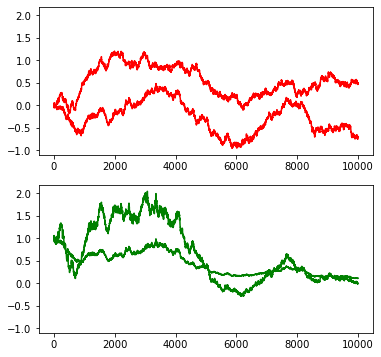

In [17]:
f1,p1=plt.subplots(2,1,figsize=(6,6),sharey=True)
p1[0].plot(training[0][:10000],'r')
p1[1].plot(training[1][:10000],'g')
#plt.savefig('trainingpath.pdf')
plt.show()

In [18]:
BMpath=training[0]
Y = training[1]
Ydata = np.squeeze(Y)
Ydatadiff = np.diff(Ydata,axis=0)
Ytrain = np.concatenate((Ydata[:1000],Ydatadiff[:1000:1]),axis=0)
np.shape(Ytrain)

(2000, 2)

In [19]:
X=Sabr.reservoir(BMpath)
np.shape(X)
Xdata = np.squeeze(X)
Xdatadiff = np.diff(Xdata,axis=0)
Xtrain=np.concatenate((Xdata[:1000],Xdatadiff[:1000:1]),axis=0)
np.shape(Xtrain)

(2000, 150)

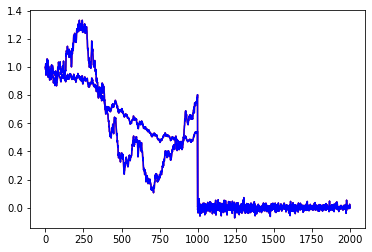

0.9999999619101437

In [20]:
from sklearn import linear_model
import pandas as pd
lm = linear_model.LinearRegression()
model = lm.fit(Xtrain,Ytrain)
plt.plot(model.predict(Xtrain),'r')
plt.plot(Ytrain,'b')
plt.show()
model.score(Xtrain,Ytrain)
# model.coef_

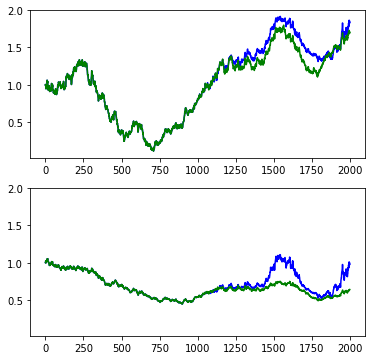

In [21]:
f,p=plt.subplots(2,1,figsize=(6,6),sharey=True)

N=2

for i in range(N):
    p[i].plot(model.predict(Xdata[:2000])[:,i],'b')
    p[i].plot(Ydata[:2000][:,i],'g')
plt.savefig('training.pdf')
plt.show()

In [22]:
generalization = Sabr.path()
BMpath = generalization[0]
Y = generalization[1]
Ydata = np.squeeze(Y)

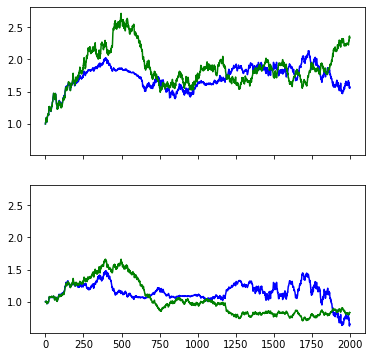

In [11]:
X = Sabr.reservoir(BMpath)
Xdata = np.squeeze(X)

N=2

fig,p=plt.subplots(N, 1, figsize=(6,6),sharex=True, sharey=True)
for i in range(N):
    p[i].plot(model.predict(Xdata[:2000])[:,i],'b')
    p[i].plot(Ydata[:2000][:,i],'g')
#plt.savefig('generalization.pdf')
plt.show()

An second very interesting strand of applications is to build econometric models, i.e. data-driven scenario generators which are estimated by regression.

In [20]:
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt
import pandas as pd
import pandas_datareader.data as web

In [25]:
end = '2019-01-01'
start = '2014-01-01'
get_px = lambda x: web.DataReader(x, 'yahoo', start=start, end=end)['Adj Close']

symbols = ['MSFT', 'GOOG', 'FB', 'BAC']#,'APPL']
# raw adjusted close prices
data = pd.DataFrame({sym:get_px(sym) for sym in symbols})
# log returns
lrets = np.log(data/data.shift(1)).dropna()

In [27]:
lrets.loc['2014-01-02'].values

array([ 0.03347343,  0.00109724, -0.00679552, -0.0067051 ])

In [28]:
Omega = (lrets
         .rolling(30)
         .cov()
         .dropna()) # this will get you to 66 windows instead of 125 with NaNs

In [29]:
dates = lrets.index#Omega.index.get_level_values(0) # or just the index of your base returns

In [30]:
dates = dates[30:]

In [31]:
covdata = dict(zip(dates, [Omega.loc[date].values for date in dates]))

In [32]:
marketBM = dict(zip(dates, [np.matmul(np.linalg.inv(linalg.sqrtm(Omega.loc[date].values)),lrets.loc[date].values) for date in dates]))

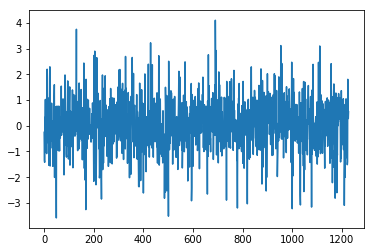

In [33]:
plt.plot([marketBM[date][0] for date in dates])
plt.show()

In [34]:
K=4
BMmarketpath = np.zeros((len(dates),K))
mean=np.zeros(K)
for k in range(K):
    mean[k] = np.mean([marketBM[l][k] for l in dates])

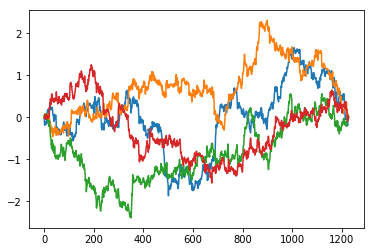

In [35]:
for i in range(K):
    BMmarketpath[:,i] = np.cumsum([np.sqrt(1/250)*(marketBM[date][i]-mean[i])
                                                   for date in dates])
plt.plot(BMmarketpath)
plt.show()

In [36]:
Kmarket = 4
Ymarket = np.zeros((len(dates),Kmarket)) 
for i in range(Kmarket):
    Ymarket[:,i]=np.cumsum([lrets.loc[date].values[i] for date in dates])
Ymarket = np.exp(Ymarket)

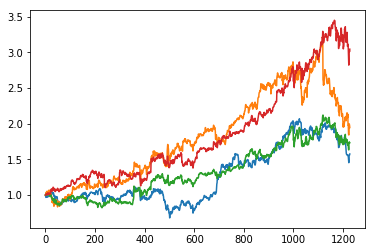

In [37]:
plt.plot(Ymarket)
plt.show()

In [38]:
Ymarketdiff = np.diff(Ymarket,axis=0)
Ymarkettrain = np.concatenate((Ymarket[:1000],Ymarketdiff[:1000:1]),axis=0)
np.shape(Ymarkettrain)

(2000, 4)

In [47]:
d=K
M=150

def nilpotent(M):
    B = np.zeros((M,M))
    for i in range(2,M):
        B[i,i-1]=1.0
    return B

def canonical(i,M):
    e = np.zeros((M,1))
    e[i,0]=1.0
    return e

def randomAbeta(d,M):
    A = []
    beta = []
    for i in range(d):
        #B = 0.1*np.identity(M)+np.random.normal(0.0,.5,size=(M,M))
        B = np.random.normal(0.0,0.05,size=(M,M)) # 0.1 for scen-gen, 1.5 for SABR
        B = np.random.permutation(B)
        #B = np.identity(M)
        #B = sp.linalg.sqrtm(np.matmul(B,np.transpose(B)))
        A = A + [B]
        beta = beta + [canonical(i,M)+np.random.normal(0.0,0.05,size=(M,1))]
    return [A,beta]

Abeta = randomAbeta(d,M)
A = Abeta[0]
beta = Abeta[1]

def sigmoid(x):
    return np.tanh(x)

def reservoirfield(state,increment):
    value = np.zeros((M,1))
    for i in range(d):
        value = value + sigmoid(np.matmul(A[i],state) + beta[i])*increment[i]
    return value

In [48]:
BMmarketpathlist = [BMmarketpath[i,:] for i in range(len(dates))]
Reservoir = SDE(1,0.5,2,K,M,vectorfield2d,len(dates)-1)
X=Reservoir.reservoir(BMmarketpathlist)
np.shape(X)
Xdata = np.squeeze(X)
Xdatadiff = np.diff(Xdata,axis=0)
Xtrain=np.concatenate((Xdata[:1000],Xdatadiff[:1000:1]),axis=0)
np.shape(Xtrain)

(2000, 150)

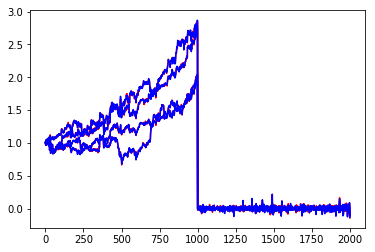

array([[ 2.00987131e+00, -2.58381955e-01,  4.31214172e-02,
        -3.28024988e-01, -2.39990974e-01, -1.19660670e-01,
         1.07118557e-01, -2.97464362e-01, -1.53318920e+00,
        -6.10897398e-01,  2.93261480e-01,  1.07377871e+00,
        -8.00988223e-01, -1.35453127e+00,  5.84191843e-01,
        -2.77393043e-01,  1.37997681e-01,  1.41235474e-01,
        -4.30922754e-01, -2.78367249e-01, -2.60115831e-02,
        -4.68088963e-01, -2.56278471e-02, -3.32804307e-01,
        -1.07928906e-01,  5.66821565e-01, -2.01992129e-01,
        -1.27097480e+00, -5.28026941e-01,  2.26616223e-01,
         4.87995486e-01,  5.03339323e-01,  5.24473237e-01,
         1.63272708e+00, -1.04976963e-01,  7.46999617e-01,
        -2.32307688e-01,  2.89111864e-01,  7.89009856e-01,
         4.18740998e-01, -1.29745668e+00,  1.75630928e-01,
        -1.91053436e-01,  6.68043393e-01, -7.19217800e-01,
         1.06112818e+00,  4.72695440e-01, -1.19021679e-01,
        -2.25295064e-03,  1.69978625e-01,  1.13675783e-0

In [49]:
from sklearn import linear_model
import pandas as pd
lm = linear_model.LinearRegression()
model = lm.fit(Xtrain,Ymarkettrain)
plt.plot(model.predict(Xtrain),'r')
plt.plot(Ymarkettrain,'b')
plt.show()
model.score(Xtrain,Ymarkettrain)
model.coef_

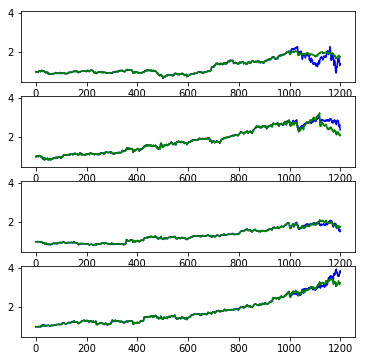

In [50]:
f,p=plt.subplots(Kmarket,1,figsize=(6,6),sharey=True)

for i in range(Kmarket):
    p[i].plot(model.predict(Xdata[:1200])[:,i],'b')
    p[i].plot(Ymarket[:1200][:,i],'g')
plt.show()

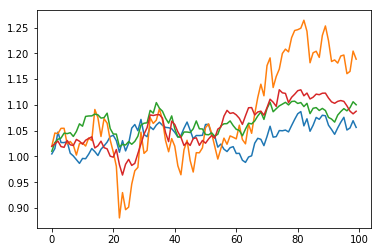

In [54]:
BMmarketpathlistrandom = [np.zeros(K)]
for i in range(len(dates)):
    BMmarketpathlistrandom = BMmarketpathlistrandom + [BMmarketpathlistrandom[-1] + np.random.normal(0,1/np.sqrt(250),K)]
Reservoir = SDE(1,0.5,2,K,M,vectorfield2d,len(dates)-1)
Xtest=Reservoir.reservoir(BMmarketpathlistrandom)
np.shape(Xtest)
Xtestdata = np.squeeze(Xtest)

plt.plot(model.predict(Xtestdata[:100]))
plt.show()

A third example goes for learning high dimensional or even infinite dimensional SDEs, like, e.g., HJM type equations.

In [2]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

In [3]:
d = 2 # number of driving Brownian motions
M = 50 # dimension of the reservoir driven by the same number of Brownian motions by
       # the reservoir vector field which uses random matrices defined below

In [4]:
def sigmoid(x):
    return np.tanh(x)

def grid(dimension):
    B = np.zeros((dimension,1))
    for i in range(dimension):
        B[i,0]=  i + 1.0
    return B

def nilpotent(M):
    B = np.zeros((M,M))
    for i in range(2,M):
        B[i,i-1]=1.0
    return B

def canonical(i,M):
    e = np.zeros((M,1))
    e[i,0]=1.0
    return e

In [5]:
def randomAbeta(d,M):
    A = []
    beta = []
    for i in range(d):
        B = 0.0*nilpotent(M) + np.random.normal(0.0,1.5,size=(M,M))
        A = A + [B]
        beta = beta + [0.0*canonical(i,M)+np.random.normal(0.0,0.5,size=(M,1))]
    return [A,beta]

Abeta = randomAbeta(d,M)
A = Abeta[0]
beta = Abeta[1]


def reservoirfield(state,increment):
    value = np.zeros((M,1))
    for i in range(d):
        value = value + sigmoid(np.matmul(A[i],state) + beta[i])*increment[i]
    return value

Now a HJM like vector field driven by $d$ Brownian motions is introduced. Maturity discretization is given by 'dimension' and vectorized by the function grid.

In [6]:
dimension = 500

def hjmfield(state,increment):
    value = np.zeros((dimension,1))
    for i in range(d):
        value = value + (0.5*((0.01*grid(dimension))**i)*
                         np.exp(-0.005*i*grid(dimension))*increment[i])
    return value

initialvalue = np.exp(-0.005*grid(dimension))

Here the essential class is defined. SDE chooses a random reservoir when instantiated. Then one can generate paths from it by method path (output: one trajectory and the corresponding Brownian motion). The second method reservoir allows to calculate the values of the reservoir given the Brownian path (which has to be given as argument). Packing everything in efficient arrays is not done well :-)

In [7]:
class SDE:
    def __init__(self,timehorizon,initialvalue,dimension,dimensionBM,dimensionR,vectorfield,timesteps,):
        self.timehorizon = timehorizon
        self.initialvalue = initialvalue # np array
        self.dimension = dimension
        self.dimensionBM = dimensionBM
        self.dimensionR = dimensionR
        self.vectorfield = vectorfield
        self.timesteps = timesteps

    def path(self):
        BMpath = [np.zeros(self.dimensionBM)]
        SDEpath = [self.initialvalue]
        
        for i in range(self.timesteps):
            helper = np.random.normal(0,np.sqrt(self.timehorizon/self.timesteps),self.dimensionBM)
            BMpath = BMpath + [BMpath[-1]+helper]
            SDEpath = SDEpath + [SDEpath[-1]+np.matmul(nilpotent(dimension)-np.identity(dimension),SDEpath[-1])*self.timehorizon/self.timesteps+self.vectorfield(SDEpath[-1],helper)]
        return [BMpath, SDEpath]
        
    def reservoir(self,BMpath):
        reservoirpath = [canonical(1,self.dimensionR)]
        for i in range(self.timesteps):
            increment = BMpath[i+1]-BMpath[i]
            reservoirpath = reservoirpath + [reservoirpath[-1]+np.matmul(nilpotent(self.dimensionR)-np.identity(self.dimensionR),reservoirpath[-1])*self.timehorizon/self.timesteps+reservoirfield(reservoirpath[-1],increment)]
        return reservoirpath    
        

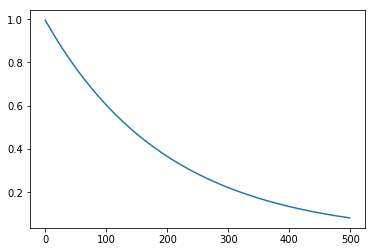

In [8]:
plt.plot(initialvalue)
plt.show()

The class object is called HJM with the above initial value. One path is stored in training, which is then fed into a simple regression.

In [9]:
HJM = SDE(1,initialvalue,dimension,d,M,hjmfield,10000)
training = HJM.path()

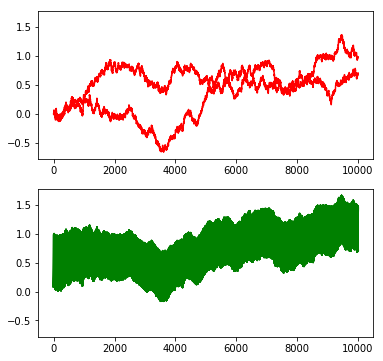

In [10]:
f1,p1=plt.subplots(2,1,figsize=(6,6),sharey=True)
p1[0].plot(training[0][:10000],'r')
Yplot = training[1]
Yplot = np.squeeze(Yplot)
p1[1].plot(Yplot[:10000],'g')
plt.show()

Here the Brownian path is extracted which is then fed into the reservoir.

In [11]:
BMpath=training[0]
Y = training[1]
Ydata = np.squeeze(Y)
Ydatadiff = np.diff(Ydata,axis=0)
Ytrain = np.concatenate((Ydata[:3000],Ydatadiff[:3000:1]),axis=0)
np.shape(Ytrain)

(6000, 500)

In [12]:
X=HJM.reservoir(BMpath)
np.shape(X)
Xdata = np.squeeze(X)
Xdatadiff = np.diff(Xdata,axis=0)
Xtrain=np.concatenate((Xdata[:3000],Xdatadiff[:3000:1]),axis=0)
np.shape(Xtrain)

(6000, 50)

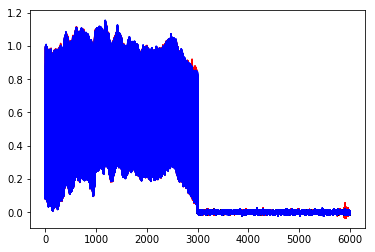

array([[-0.04186173,  0.99197093,  0.0300214 , ...,  0.0476258 ,
        -0.90286107,  0.06887046],
       [-0.03995141,  0.98702711,  0.02991239, ...,  0.04800605,
        -0.90007045,  0.06956921],
       [-0.03192013,  0.98285993,  0.08948489, ...,  0.05253315,
        -0.82485607,  0.0580389 ],
       ...,
       [ 0.12618577,  0.08267644,  0.02855773, ...,  0.06450856,
        -0.199809  ,  0.06669257],
       [ 0.12608484,  0.08226237,  0.02847401, ...,  0.06443708,
        -0.19947263,  0.06655006],
       [ 0.12598391,  0.08185038,  0.02839056, ...,  0.06436575,
        -0.19913775,  0.06640785]])

In [13]:
from sklearn import linear_model
import pandas as pd
lm = linear_model.LinearRegression()
model = lm.fit(Xtrain,Ytrain)
plt.plot(model.predict(Xtrain),'r')
plt.plot(Ytrain,'b')
plt.show()
model.score(Xtrain,Ytrain)
model.coef_

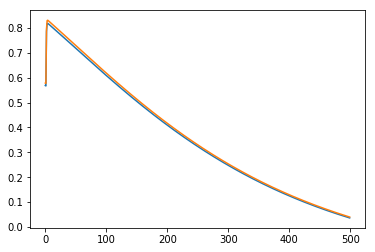

In [14]:
plt.plot(model.predict(Xdata[:6000])[3000,:])
plt.plot(Ydata[:6000][3000,:])
plt.show()

Now generalizations are considered.

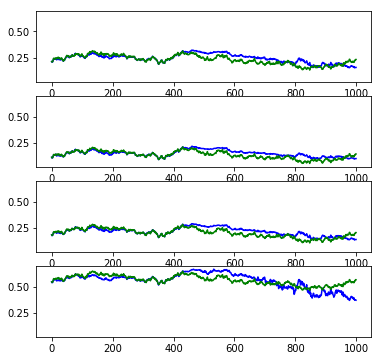

In [15]:
generalization = HJM.path()
BMpathgen = generalization[0]
Ygen = generalization[1]
Ygendata = np.squeeze(Ygen)

Xgen = HJM.reservoir(BMpathgen)
Xgendata = np.squeeze(Xgen)

N=4

fig,p=plt.subplots(N, 1, figsize=(6,6), sharey=True)
for i in range(N):
    j = np.random.randint(0,dimension)
    p[i].plot(model.predict(Xgendata[:1000])[:,j],'b')
    p[i].plot(Ygendata[:1000][:,j],'g')

plt.show()